# COMP2200/6200 Week 6 Prac

## Part 1 -- Interactive Immersive Experience

Interactive k-means and DBSCAN to help understand these algorithms.

There is no code to submit for this prac activity, but your participation will help! Take a seat.

### K-means instructions

To start: your SGTA leader will place a few random objects around the room. Depending on what is at hand, this might be a pen, whiteboard eraser, ball or piece of paper. These are the *centroids* for the algorithm.

Cycle through the following:

- The SGTA leader asks "what object (the pen, the eraser, ...) are you closest to?" If everybody is closest to the same object as they were in the last round, then the algorithm has completed
 
- The SGTA leader then moves the first object. They ask "who was closest to (the first object)?" and then place it in the "average" of the position in the room of those people.

- Then the second object, the third and so on.

- Repeat the cycle

Observe what happened. Where are the centroids now? How many distinct groups are there? 

#### Variations

Try some variations:

- Different starting points -- what if all the centroids are in one corner of the room, or in the centre?

- Different numbers of centroids -- if there is an obvious number of clusters in the room, what happens if you start with a different number of centroids?

### DBSCAN instructions

We'll set "epsilon" (the radius for the algorithm) to be "one arm's length". Initially we'll set "number of points" to 2. So if anyone is in arm's length range of you, you will form a cluster with them.

- To start: you are a cluster of one. Your cluster has no name.
- 
- If you can reach someone else, you need to merge clusters with them. You will need to negotiate a name for your cluster. Make sure everyone in the cluster agrees on your cluster name.

- Repeat the process with each other person you can reach. Keep going until you everyone within reach of anyone else agrees on the name of their cluster.

How many clusters did you form? Were there any outliers? (Clusters with 1 person in them.)

#### Variations

- What happens if you set "number of points" to 3? Only negotiate to merge clusters if there are two people in arm's length of you. That means that if only one person is within reach of you, you won't initiate cluster forming with them -- but they might initiate cluster formation with you. How many clusters did you form? Were there any outliers? (Which could even be two people standing next to each other).

- What happens if you set epsilon to be "within hearing range"?


## Part 2 -- Can we determine how many different countries or cities your prac group is from?

We will use DBSCAN on some geographic data

We will need to import the part of the scikit-learn library that deals with clustering.

In [2]:
import sklearn.cluster
import sklearn.metrics

We will also need to import the pandas (PAnels, DAtaframes and Series) library

In [3]:
import pandas as pd

Unless your SGTA leader has created another spreadsheet for you, use the following spreadsheet.

https://mqoutlook-my.sharepoint.com/:x:/g/personal/greg_baker_mq_edu_au/EcBcNwpXINhNgJ1r56CjI3YBJ-QmjoGs-Rf3hcbsea-n3w?e=oCfJ2b

Look for the spreadsheet tab with your prac group in it. 

Add a row for some place in your home town -- it could be a famous landmark, a place you liked to visit or you could
just make something up and pretend you are from somewhere else.

----

When everyone has finished entering data, download the spreadsheet. (File -> Create a copy -> Download). 

Create a dataframe from it using `pd.read_excel`. You will need to supply the filename you saved it as. You will also need to supply the sheetname.

----

If you get this error: `ModuleNotFoundError: No module named 'openpyxl'` then you need to install the openpyxl library for manipulating
Excel spreadsheets.

- If you use anaconda: `!conda install openpyxl`

- If you use uv, `!uv add openpyxl`

- If you use pip to install things, `!pip install openpyxl`

In [4]:
locations = pd.read_excel('COMP2200-6200 Week 6 Prac - Interesting locations.xlsx', sheet_name='Sheet2')
locations

,Latitude,Longitude
0,-34.052535,150.830568
1,-33.773763,151.112000
2,-44.670172,167.924372
3,-33.778732,151.121487
4,-34.039404,150.840588
5,0.981885,104.041583
6,-34.049802,150.823777
7,27.987930,86.924460
8,-33.806944,150.972500
9,29.159240,75.798513


What sort of epsilon (`eps`) should we use? If two students have chosen sites within one longitude or one latitude (about 111km at the equator) should that be close enough to put them in the same cluster?

What should we use for `min_samples`?

Create a DBScan object (`sklearn.cluster.DBSCAN`) and use `fit_predict` on the location data.

In [5]:
dbscan =sklearn.cluster.DBSCAN(min_samples=2, eps=0.5)
locations['dbscan_results'] = dbscan.fit_predict(locations[['Longitude', 'Latitude']])

If you aren't confident with programming, export this updated dataframe to Excel and have a look at it there.

In [6]:
locations.to_excel('locations-with-cluster.xlsx')

How many different clusters did it find? Which points were in the cluster?

In [7]:
#here's how we do it in python
locations['dbscan_results'].value_counts()

dbscan_results
 0    16
-1    11
 1     2
 2     2
Name: count, dtype: int64

If you are comfortable programming, create a scatter plot.

<Axes: xlabel='Longitude', ylabel='Latitude'>

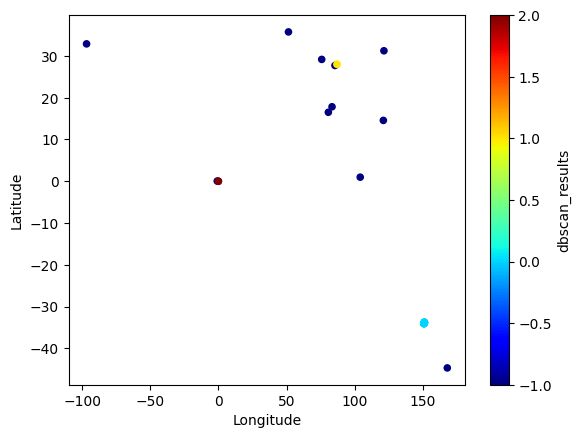

In [8]:
locations.plot.scatter(x='Longitude', y='Latitude', c='dbscan_results', cmap='jet')

### Advanced

This isn't part of the prac. But if you are a computer science student with a strong mathematical background, you might enjoy this.

There's a problem with what we have done. Two people that live 100km apart at the equator could be in one cluster, but two people that live  50km apart very close to the north pole would be several longitudes apart.

We should map these locations into 3D space and cluster on the 3D coordinates.

In [9]:
import numpy as np
#earth's radius in kilometers
R = 6371.0

#Convert degree to radians
lat_rad = np.radians(locations['Latitude'])
lon_rad = np.radians(locations['Longitude']) #assuming the typo is deliberate
#spherical to cartesian
locations['x'] = R * np.cos(lat_rad) * np.cos(lon_rad)
locations['y'] = R * np.cos(lat_rad) * np.sin(lon_rad)
locations['z'] = R * np.sin(lat_rad)
locations

dbscan =sklearn.cluster.DBSCAN(eps=3, min_samples=2)
locations['3d_cluster'] = dbscan.fit_predict(locations[['x', 'y', 'z']])
locations

,Latitude,Longitude,dbscan_results,x,y,z,3d_cluster
0,-34.052535,150.830568,0,-4609.118192,2572.723009,-3567.459434,0
1,-33.773763,151.112000,0,-4636.842388,2558.407584,-3541.734647,1
2,-44.670172,167.924372,-1,-4430.578882,947.862768,-4478.969518,-1
3,-33.778732,151.121487,0,-4636.996944,2557.491388,-3542.193973,1
4,-34.039404,150.840588,0,-4610.281930,2572.315225,-3566.249557,0
5,0.981885,104.041583,-1,-1545.543532,6179.726285,109.175233,-1
6,-34.049802,150.823777,0,-4608.961819,2573.352171,-3567.207669,0
7,27.987930,86.924460,1,301.843151,5617.785904,2989.818264,2
8,-33.806944,150.972500,0,-4628.805359,2568.693774,-3544.801016,-1
9,29.159240,75.798513,-1,1364.931197,5393.567126,3104.196754,-1


## Part 3 -- Can you categorise flowers into species?

Up until now we've mostly worked with data sets that use place and space. But we can also cluster using any collecting of numbers. The data we are going to work with now comes from these 3 species of iris:

- https://en.wikipedia.org/wiki/Iris_setosa
  
- https://en.wikipedia.org/wiki/Iris_versicolor

- https://en.wikipedia.org/wiki/Iris_virginica

There are measures of the sepal length and width, and the petal length and width.

---

### Step 1: Load the Iris dataset

This data set is very famous, and it is supplied as part of the scikit-learn library. We need to import the part of the library
which deals with datasets, and then call the loader, which will put the data into a variable called "iris"

In [10]:
import sklearn.datasets
iris = sklearn.datasets.load_iris()

The next cell might be less familiar to you. We're using the pandas library, and we want to create a dataframe
(essentially, a spreadsheet of data) with the column names coming from the iris data's column names we just loaded, and the numbers
in the rows coming from the data in that iris variable.

In [11]:
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


Notice that we don't have 2 dimensional data -- it's 4-dimensional: there are 4 features. This makes it much harder to visualise.
Here's how you could visualise two of the features.

<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

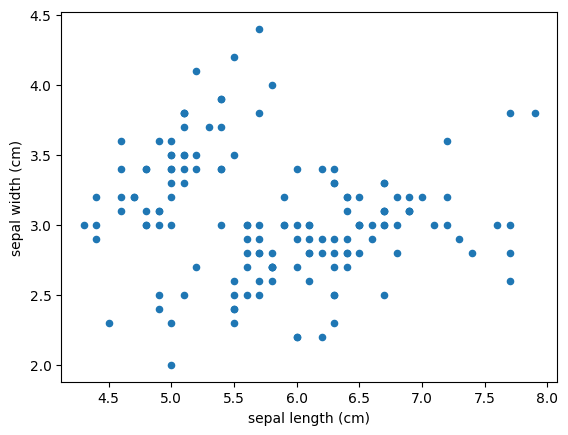

In [12]:
data.plot.scatter(x='sepal length (cm)', y='sepal width (cm)')

Now make a scatter plot of the data using the other features ('petal length (cm)' and 'petal width (cm)')

<Axes: xlabel='petal length (cm)', ylabel='petal width (cm)'>

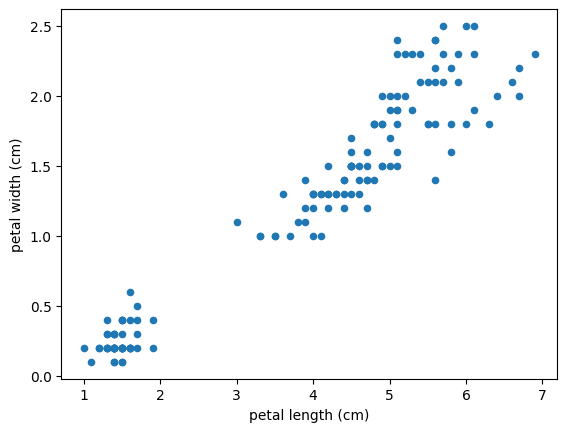

In [13]:
data.plot.scatter(x='petal length (cm)', y='petal width (cm)')

---

### Step 2: Perform K-Means Clustering

Let's jump to the answer -- we know that there are three species. We would like to get the
same answer each time, so we need to set the `random_state` for the algorithm to use. This will make
the centroids start in the same place each time.

In [14]:
kmeans = sklearn.cluster.KMeans(n_clusters=3, random_state=42)
data['kmeans_cluster_3_species'] = kmeans.fit_predict(data)
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),kmeans_cluster_3_species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0


We can add that column as the colour to the plot we made earlier. "c" is short for "colour", and "cmap" is short for "colourmap".

### Try a few other cluster sizes

But if we didn't know it was three species, could we figure it out?

Try a few other options. What happens if you use 2 clusters, or 4 or 5? Copy the code into a new cell
and make any necessary changes.

<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

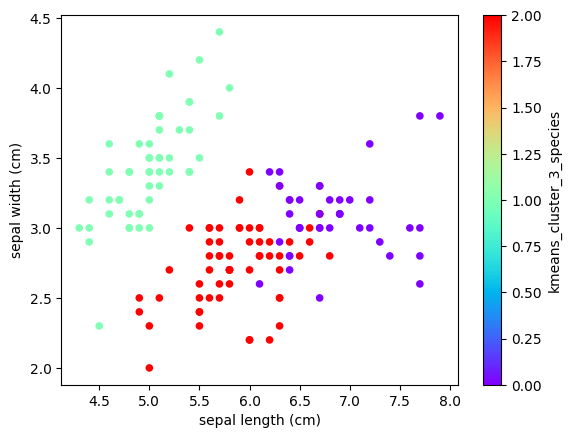

In [15]:
data.plot.scatter(x='sepal length (cm)', y='sepal width (cm)', c='kmeans_cluster_3_species', cmap='rainbow')

In [16]:
kmeans_2 = sklearn.cluster.KMeans(n_clusters=2, random_state=42)
kmeans_4 = sklearn.cluster.KMeans(n_clusters=4, random_state=42)
kmeans_5 = sklearn.cluster.KMeans(n_clusters=5, random_state=42)

data['kmeans_cluster_2_species'] = kmeans_2.fit_predict(data)
data['kmeans_cluster_4_species'] = kmeans_4.fit_predict(data)
data['kmeans_cluster_5_species'] = kmeans_5.fit_predict(data)
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),kmeans_cluster_3_species,kmeans_cluster_2_species,kmeans_cluster_4_species,kmeans_cluster_5_species
0,5.1,3.5,1.4,0.2,1,1,2,4
1,4.9,3.0,1.4,0.2,1,1,1,2
2,4.7,3.2,1.3,0.2,1,1,1,2
3,4.6,3.1,1.5,0.2,1,1,1,2
4,5.0,3.6,1.4,0.2,1,1,2,4
...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,0,3,1
146,6.3,2.5,5.0,1.9,2,0,0,0
147,6.5,3.0,5.2,2.0,0,0,3,1
148,6.2,3.4,5.4,2.3,0,0,3,1


<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

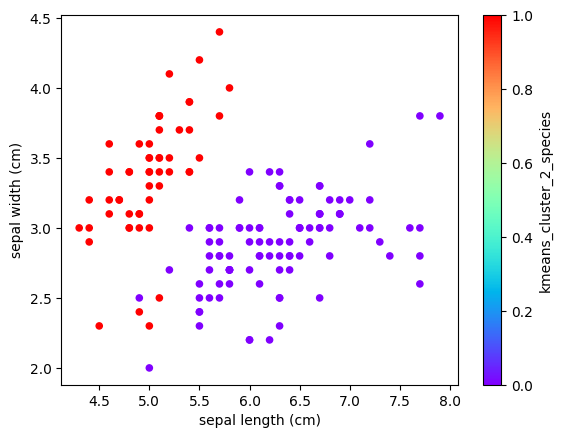

In [17]:
data.plot.scatter(x='sepal length (cm)', y='sepal width (cm)', c='kmeans_cluster_2_species', cmap='rainbow')

<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

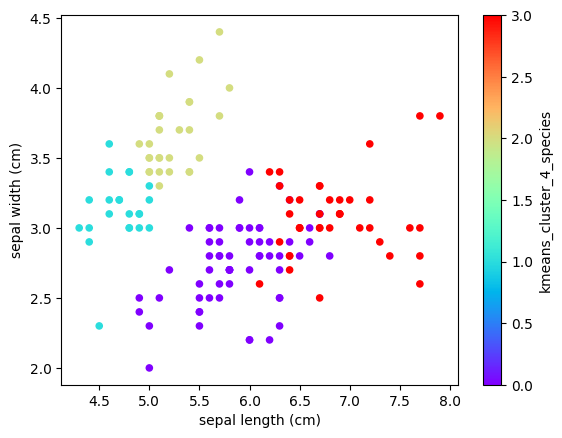

In [18]:
data.plot.scatter(x='sepal length (cm)', y='sepal width (cm)', c='kmeans_cluster_4_species', cmap='rainbow')

Visualise some of these other clusterings. Take a previous visualisation, and change the `c=` parameter to use a new column name.

<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

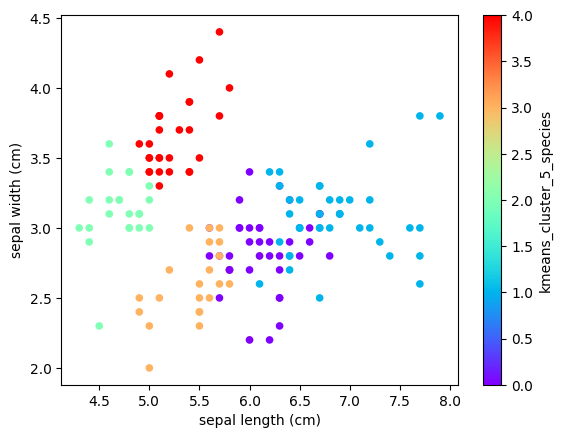

In [19]:
data.plot.scatter(x='sepal length (cm)', y='sepal width (cm)', c='kmeans_cluster_5_species', cmap='rainbow')

.---

### Step 3: Evaluate Clusters

Check how well your clusters are separated using `sklearn.metrics.silhouette_score`. It needs the data you used for
clustering and the labels your clust

In [20]:
score3 = sklearn.metrics.silhouette_score(data[iris.feature_names], data['kmeans_cluster_3_species'])


print("Silhouette Score:", score3)


Silhouette Score: 0.551191604619592


- Scores close to **1** indicate good clustering.
- Scores near **0** mean clusters overlap.
- Negative scores indicate points might be wrongly clustered.

Look at the silhouette score for the 2,4 and 5 cluster options as well. If you are feeling confident with Python you can code a visualisation here. If you aren't, feel free to use Excel or some graph paper to see how the silhouette score performs.

You'll find that it isn't all that informative -- as the number of clusters increases, the silhouette score gets worse. This would
suggest that two clusters is the best.

---

In [21]:
score2 = sklearn.metrics.silhouette_score(data[iris.feature_names], data['kmeans_cluster_2_species'])
print("Silhouette Score (2):", score2)
score4 = sklearn.metrics.silhouette_score(data[iris.feature_names], data['kmeans_cluster_4_species'])
print("Silhouette Score (4):", score4)
score5 = sklearn.metrics.silhouette_score(data[iris.feature_names], data['kmeans_cluster_5_species'])
print("Silhouette Score (5):", score5)

Silhouette Score (2): 0.6810461692117462
Silhouette Score (4): 0.4137668162428513
Silhouette Score (5): 0.35608362578320735


<Axes: >

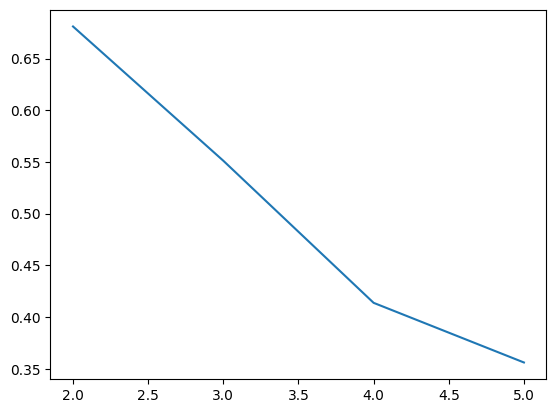

In [23]:
silhouette_data = pd.Series(index=[2,3,4,5], data=[score2, score3, score4, score5])
silhouette_data.plot()

There are several other metrics that are used for measuring how good a cluster specification is.

- Calinski-Harabasz
- Davies-Bouldin

One of the nice things about the scikit-learn library, is that you can copy the code for the Silhouette score and replace it with another metric. e.g. Replace `sklearn.metrics.silhouette_score` with `sklearn.metrics.davies_bouldin_score`.

There is also some documentation on how they work, e.g. https://scikit-learn.org/stable/modules/clustering.html#calinski-harabasz-index

Try these two, and see if you can find any spikes that might indicate that a particular number of clusters is especially good
according to one of these metrics.

<Axes: >

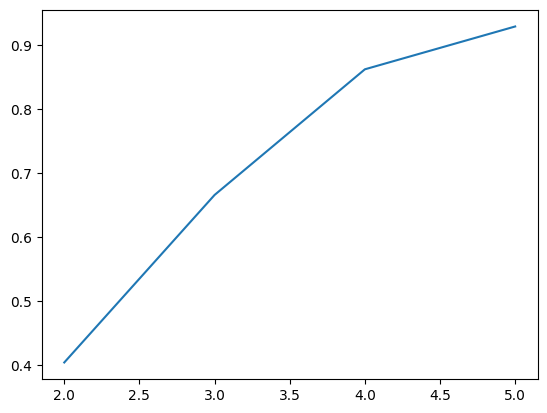

In [24]:
# The solution I've created here is for slightly-sophisticated programmers...

davies_scores = []
for i in range(2,6):
    davies_scores.append(sklearn.metrics.davies_bouldin_score(data[iris.feature_names], data[f'kmeans_cluster_{i}_species']))

davies_scores = pd.Series(index=range(2,6), data=davies_scores)
davies_scores.plot()

<Axes: >

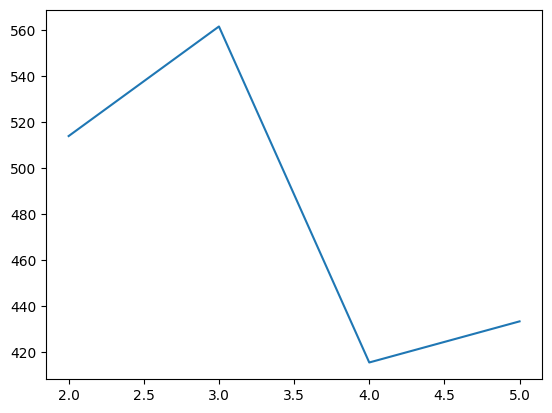

In [25]:
# The solution I've created here is for slightly-sophisticated programmers...

calinksi_scores = []
for i in range(2,6):
    calinksi_scores.append(sklearn.metrics.calinski_harabasz_score(data[iris.feature_names], data[f'kmeans_cluster_{i}_species']))

calinski_scores = pd.Series(index=range(2,6), data=calinksi_scores)
calinski_scores.plot()

### Step 4: Perform DBSCAN Clustering

DBSCAN tries to find clusters by density. Run this:

In [26]:
dbscan = sklearn.cluster.DBSCAN(eps=0.5, min_samples=5)
data['dbscan_cluster'] = dbscan.fit_predict(data[iris.feature_names])
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),kmeans_cluster_3_species,kmeans_cluster_2_species,kmeans_cluster_4_species,kmeans_cluster_5_species,dbscan_cluster
0,5.1,3.5,1.4,0.2,1,1,2,4,0
1,4.9,3.0,1.4,0.2,1,1,1,2,0
2,4.7,3.2,1.3,0.2,1,1,1,2,0
3,4.6,3.1,1.5,0.2,1,1,1,2,0
4,5.0,3.6,1.4,0.2,1,1,2,4,0
...,...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,0,3,1,1
146,6.3,2.5,5.0,1.9,2,0,0,0,1
147,6.5,3.0,5.2,2.0,0,0,3,1,1
148,6.2,3.4,5.4,2.3,0,0,3,1,1


Pick your favourite metric and measure how good the DBSCAN clustering was.

In [27]:
sklearn.metrics.calinski_harabasz_score(data[iris.feature_names], data[f'dbscan_cluster'])

np.float64(220.29751498443005)

We can also look at different values for `eps` or `min_samples` and see if we can find a better clustering.

In [28]:
alternate_dbscan = sklearn.cluster.DBSCAN(eps=0.25, min_samples=5)
sklearn.metrics.calinski_harabasz_score(data[iris.feature_names], alternate_dbscan.fit_predict(data[iris.feature_names]))

np.float64(58.01522715592349)

In [29]:
alternate_dbscan.fit_predict(data[iris.feature_names])

array([ 0,  0,  0,  0,  0, -1,  0,  0, -1,  0,  0,  0,  0, -1, -1, -1, -1,
        0, -1,  0, -1,  0, -1,  0, -1,  0,  0,  0,  0,  0,  0, -1, -1, -1,
        0,  0, -1,  0, -1,  0,  0, -1,  0,  0, -1,  0,  0,  0,  0,  0, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1,  1, -1, -1, -1, -1, -1,  1,  1,  1, -1, -1,  1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

---

### Discussion Questions:

1. How many clusters did each method identify?
2. Which clustering results seem clearer or more useful?
3. Why might DBSCAN and K-means give different results?
4. What does your Silhouette Score / Davies-Bouldin / Calinski-Harabasz scores suggest about the quality of the K-Means clusters?
5. Why did we not do train, validation and test here?


Discuss these questions in your group.